In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects


In [56]:
data = pd.read_csv('draft-data-20-years.csv')
data.head() 

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,...,0.089,0.2,9.9,1990,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,5,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,...,0.078,0.1,15.8,1990,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


In [57]:
df = data.drop(columns=['Unnamed: 0','playerurl','College','Rk']).dropna()

In [58]:
df.isna().sum()

Pk           0
Tm           0
Player       0
Yrs          0
G            0
TOTMP        0
TOTPTS       0
TOTTRB       0
TOTAST       0
FG%          0
3P%          0
FT%          0
WS           0
WS/48        0
BPM          0
VORP         0
DraftYr      0
MPG          0
PPG          0
RPG          0
APG          0
DraftYear    0
dtype: int64

In [59]:
df.columns

Index(['Pk', 'Tm', 'Player', 'Yrs', 'G', 'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST',
       'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'BPM', 'VORP', 'DraftYr', 'MPG',
       'PPG', 'RPG', 'APG', 'DraftYear'],
      dtype='object')

In [60]:
print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns.")

The data contains 1483 rows and 22 columns.


In [61]:
duplicated_values = df.duplicated().sum()
print(f"There is {duplicated_values} duplicated values in the data.")

There is 0 duplicated values in the data.


In [62]:
df.info

<bound method DataFrame.info of       Pk   Tm                 Player   Yrs       G    TOTMP   TOTPTS  TOTTRB  \
0      1  BRK        Derrick Coleman  15.0   781.0  25903.0  12884.0  7232.0   
1      2  OKC            Gary Payton  17.0  1335.0  47117.0  21813.0  5269.0   
2      3  DEN     Mahmoud Abdul-Rauf   9.0   586.0  15628.0   8553.0  1087.0   
3      4  ORL           Dennis Scott  10.0   629.0  17983.0   8094.0  1774.0   
4      5  CHA           Kendall Gill  15.0   966.0  29481.0  12914.0  4002.0   
...   ..  ...                    ...   ...     ...      ...      ...     ...   
1859  52  DET             Luka Garza   1.0    29.0    340.0    151.0    87.0   
1860  53  PHI         Charles Bassey   1.0    23.0    168.0     69.0    62.0   
1861  54  IND  Sandro Mamukelashvili   1.0    34.0    315.0    102.0    60.0   
1862  55  OKC          Aaron Wiggins   1.0    34.0    762.0    243.0   115.0   
1867  60  IND   Georgios Kalaitzakis   1.0     9.0     48.0     16.0     8.0   

      T

In [63]:
grouped_picks = {}
for i in df['Pk'].unique():
    grouped_picks[i] = df.loc[df['Pk'] == i].reset_index(drop=True)

In [101]:
average_ppg_from_grouped = {}
average_vorp_from_grouped = {}
average_winshare_from_grouped = {}

for pick, group in grouped_picks.items():
    average_ppg = group['PPG'].mean()
    average_vorp = group['VORP'].mean()
    average_winshare = group['WS'].mean()
    average_ppg_from_grouped[pick] = average_ppg
    average_vorp_from_grouped[pick] = average_vorp
    average_winshare_from_grouped[pick] = average_winshare


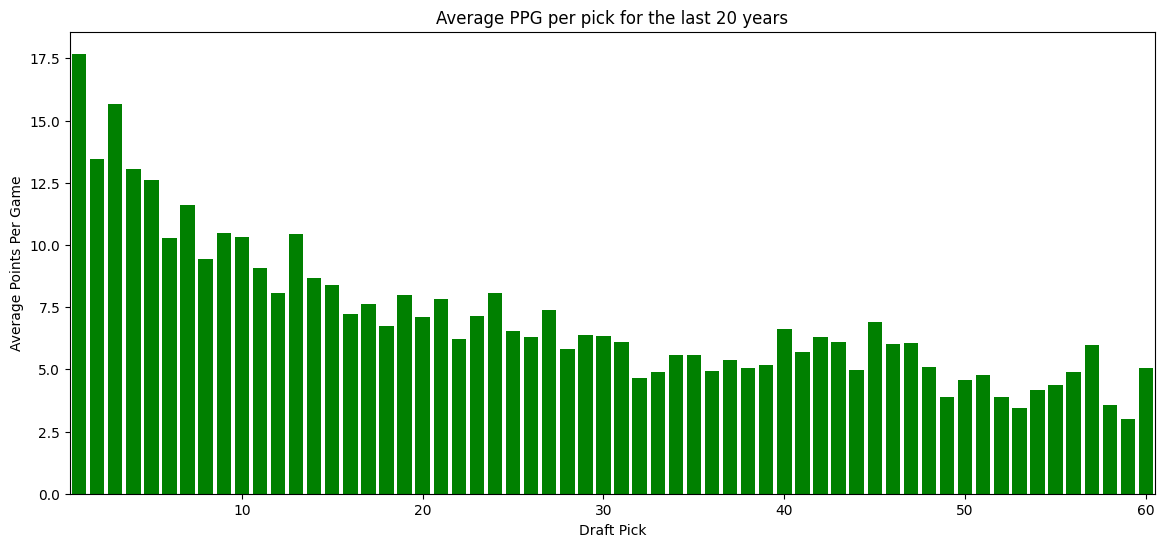

In [102]:
picks = list(average_ppg_from_grouped.keys())
average_ppg = list(average_ppg_from_grouped.values())

plt.figure(figsize=(14,6))
plt.bar(picks, average_ppg, color='Green')
plt.xlabel('Draft Pick')
plt.ylabel('Average Points Per Game')
plt.title('Average PPG per pick for the last 20 years')
plt.xlim(min(picks)-0.5, max(picks)+0.5)

plt.show()

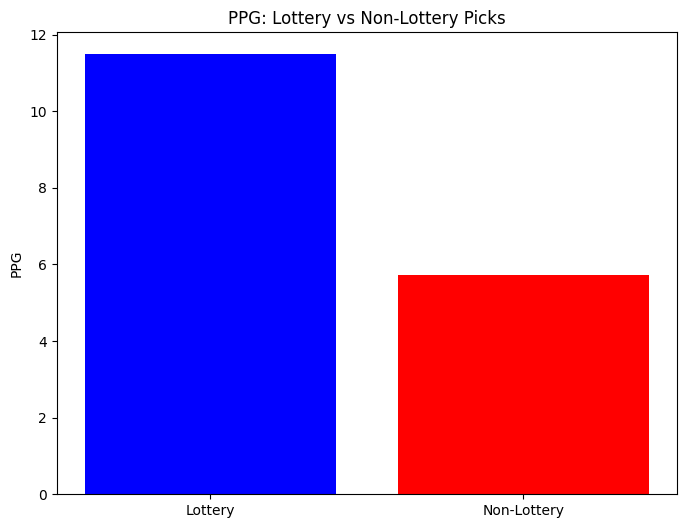

In [103]:
#Distribution between lottery vs non lottery ppg
lottery = list(average_ppg_from_grouped.values())[0:14]
non_lottery = list(average_ppg_from_grouped.values())[15:60]

lottery_avg = np.mean(lottery)
non_lottery_avg = np.mean(non_lottery)

categories = ['Lottery', 'Non-Lottery']
values = [lottery_avg, non_lottery_avg]

plt.figure(figsize=(8,6))
plt.bar(categories, values, color=['blue','red'])
plt.ylabel('PPG')
plt.title('PPG: Lottery vs Non-Lottery Picks')
plt.show()




I computed the points per game (PPG) for each draft pick and then categorized these picks into two groups: lottery and non-lottery. Following this categorization, I calculated the average PPG for each group to analyze their performance.

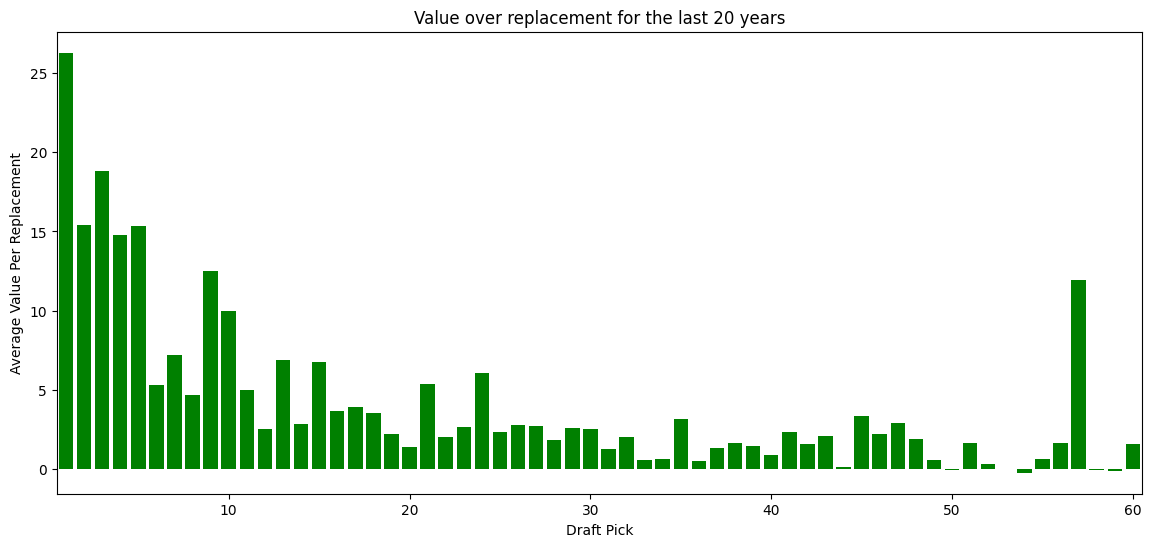

In [104]:
picks = list(average_vorp_from_grouped.keys())
vorp = list(average_vorp_from_grouped.values())

plt.figure(figsize=(14,6))
plt.bar(picks,vorp, color='Green')
plt.ylabel('Average Value Per Replacement')
plt.xlabel('Draft Pick')
plt.title('Value over replacement for the last 20 years')
plt.xlim(min(picks)-0.5, max(picks)+0.5)



plt.show()

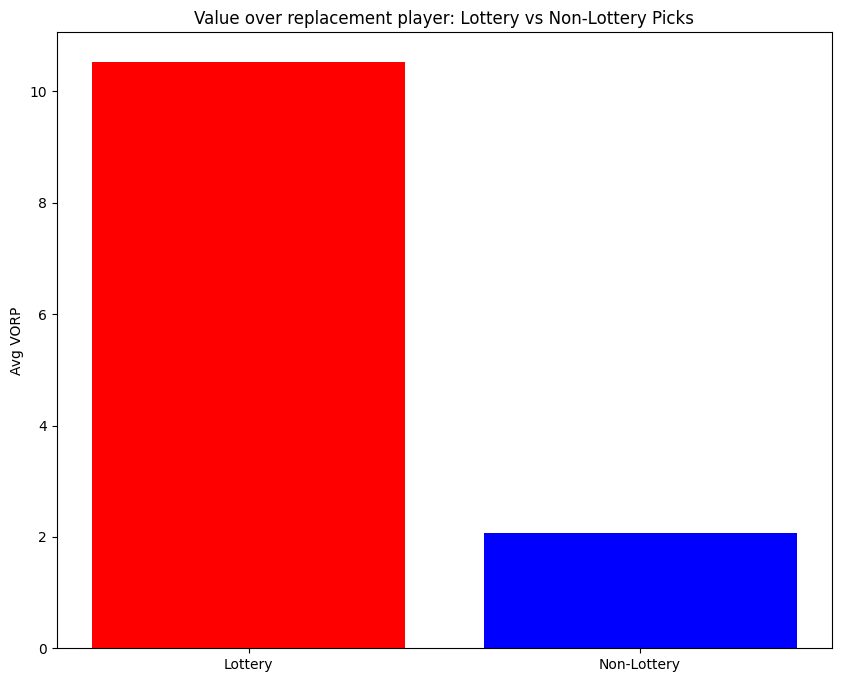

In [105]:
lottery = list(average_vorp_from_grouped.values())[0:14]
non_lottery = list(average_vorp_from_grouped.values())[15:60]

sum_lottery = np.mean(lottery)
sum_non_lottery = np.mean(non_lottery)

categories = ['Lottery', 'Non-Lottery']
values = [sum_lottery, sum_non_lottery]

plt.figure(figsize=(10,8))
plt.bar(categories,values, color=['red','blue'])
plt.ylabel('Avg VORP')
plt.title('Value over replacement player: Lottery vs Non-Lottery Picks')
plt.show()

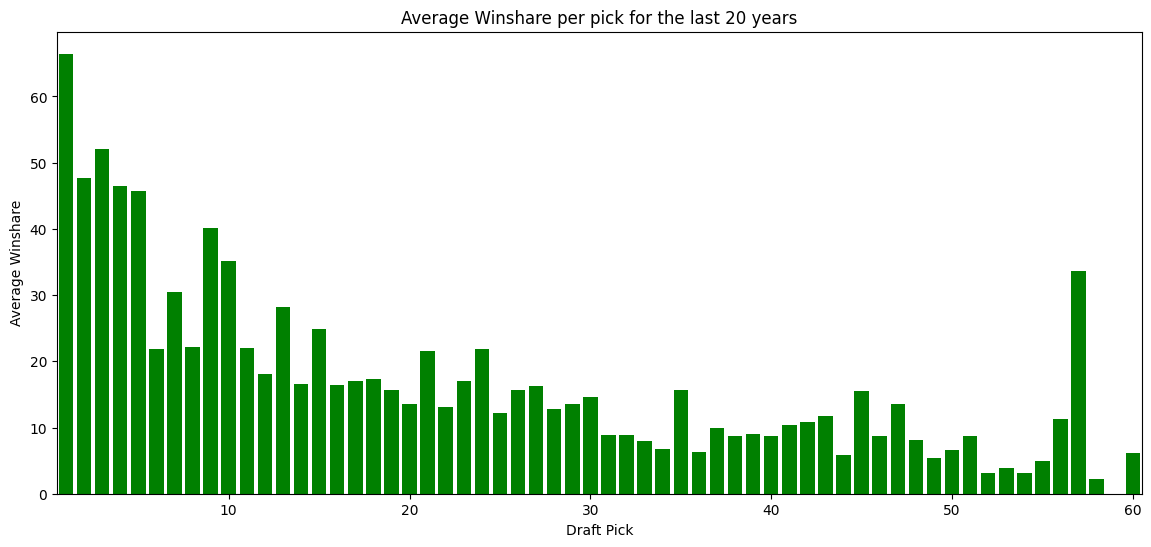

In [106]:
picks = list(average_winshare_from_grouped.keys())
winshare = list(average_winshare_from_grouped.values())

plt.figure(figsize=(14,6))
plt.bar(picks,winshare, color='Green')
plt.ylabel('Average Winshare')
plt.xlabel('Draft Pick')
plt.title('Average Winshare per pick for the last 20 years')
plt.xlim(min(picks)-0.5, max(picks)+0.5)



plt.show()
